In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pylab as plt 
import statsmodels.api as st 
import numpy as np
import plotly.express as px
import warnings 
warnings.simplefilter('ignore')

In [2]:
sales_april=pd.read_csv('../../data/Sales_Data_electronics/Sales_April_2019.csv')
sales_april_ori=sales_april # for storing original data 


In [3]:
#looking columns 
sales_april.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [4]:
#shape
sales_april.shape

(18383, 6)

In [5]:
#info data  
sales_april.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


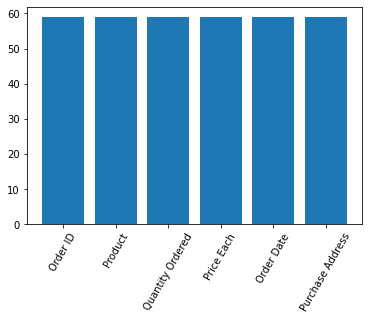

In [6]:
# visuliazation of null data
name_column=[]
sum_null=[]
for i in sales_april.columns:
    x=(sum(sales_april['Order ID'].isnull()))
    name_column.append(i)
    sum_null.append(x)
plt.bar(name_column,sum_null)
plt.xticks(rotation=60)
plt.show()

In [7]:
# if we drop nan value than we loss information 
null_value_sum=sales_april.isnull().sum()

In [8]:
(sum(null_value_sum)/sales_april.size)*100 

0.32094870260566827

In [9]:
# we loss 0.32 % of data after the droping  the null values it's neglible 
sales_april=sales_april.dropna()

In [10]:
#left data

sales_april.shape

(18324, 6)

In [11]:
sales_april.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


<b> <h2> Cleaning data </h2> </b>

In [12]:
# cleaning column and seperate appropriate colums
i=sales_april[sales_april['Quantity Ordered']=='Quantity Ordered'].index 
# here we look sales_april['Quantity Ordered'].unique() we find  'Quantity Ordered' so it's noise (order id etc in row)
sales_april.drop(i,axis=0,inplace=True) 

In [13]:
#convert to object to int or float respectivly columns 
sales_april['Quantity Ordered']=sales_april['Quantity Ordered'].astype(int) 
sales_april['Price Each']=sales_april['Price Each'].astype(float) 

In [14]:
# seperate columns time or date from orderdate
sales_april['Order Date']=sales_april['Order Date'].str.split(' ')

In [15]:
sales_april['ord_date']=sales_april['Order Date'].apply(lambda x : x[0])
sales_april['ord_time']=sales_april['Order Date'].apply(lambda x : x[1])

In [16]:
sales_april['ord_date_day']=sales_april['ord_date'].str.split('/').apply(lambda x:int(x[1]))
sales_april['ord_date_month']=sales_april['ord_date'].str.split('/').apply(lambda x:int(x[0]))

In [17]:
sales_april['ord_time']=sales_april['ord_time'].str.split(':').apply(lambda x :round(float(x[0])+float(x[1])/60,2))


In [18]:
sales_april.head(10)
#note we are not making year columns because all the data in
# year same but month diffrent (it's april but outside sales data have diffrent month)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,ord_date,ord_time,ord_date_day,ord_date_month
0,176558,USB-C Charging Cable,2,11.95,"[04/19/19, 08:46]","917 1st St, Dallas, TX 75001",04/19/19,8.77,19,4
2,176559,Bose SoundSport Headphones,1,99.99,"[04/07/19, 22:30]","682 Chestnut St, Boston, MA 02215",04/07/19,22.50,7,4
3,176560,Google Phone,1,600.00,"[04/12/19, 14:38]","669 Spruce St, Los Angeles, CA 90001",04/12/19,14.63,12,4
4,176560,Wired Headphones,1,11.99,"[04/12/19, 14:38]","669 Spruce St, Los Angeles, CA 90001",04/12/19,14.63,12,4
5,176561,Wired Headphones,1,11.99,"[04/30/19, 09:27]","333 8th St, Los Angeles, CA 90001",04/30/19,9.45,30,4
6,176562,USB-C Charging Cable,1,11.95,"[04/29/19, 13:03]","381 Wilson St, San Francisco, CA 94016",04/29/19,13.05,29,4
7,176563,Bose SoundSport Headphones,1,99.99,"[04/02/19, 07:46]","668 Center St, Seattle, WA 98101",04/02/19,7.77,2,4
8,176564,USB-C Charging Cable,1,11.95,"[04/12/19, 10:58]","790 Ridge St, Atlanta, GA 30301",04/12/19,10.97,12,4
9,176565,Macbook Pro Laptop,1,1700.00,"[04/24/19, 10:38]","915 Willow St, San Francisco, CA 94016",04/24/19,10.63,24,4
10,176566,Wired Headphones,1,11.99,"[04/08/19, 14:05]","83 7th St, Boston, MA 02215",04/08/19,14.08,8,4


In [19]:
# now we seperate address columns
sales_april['Purchase Address']=sales_april['Purchase Address'].str.split(',')

In [20]:
sales_april['area_in_city']=sales_april['Purchase Address'].apply(lambda x :x[0])
sales_april['city']=sales_april['Purchase Address'].apply(lambda x: x[1])
sales_april['state_zip']=sales_april['Purchase Address'].apply(lambda x :x[2])

<u><b><h2> now we build the cleaning data pipeline(function )</h2></b>  </u>

In [21]:
def cleaning_data(df):
    
    df=df.dropna()
    # cleaning column and seperate appropriate colums
    i = df[df['Quantity Ordered'] == 'Quantity Ordered'].index
    # here we look df['Quantity Ordered'].unique() we find  'Quantity Ordered' so it's noise (order id etc in row)
    df.drop(i, axis=0, inplace=True)
    
    #convert to object to int or float respectivly columns 
    df['Quantity Ordered']=df['Quantity Ordered'].astype(int) 
    df['Price Each']=df['Price Each'].astype(float) 
    
    # seperate columns time or date from orderdate
    df['Order Date']=df['Order Date'].str.split(' ')
    df['ord_date']=df['Order Date'].apply(lambda x : x[0]) # date 
    df['ord_time']=df['Order Date'].apply(lambda x : x[1]) # time
    df['ord_date_day']=df['ord_date'].str.split('/').apply(lambda x:int(x[1]))  #day
    
    df['ord_date_month']=df['ord_date'].str.split('/').apply(lambda x:int(x[0])) # month
    
    #time convert minute to hour 
    df['ord_time']=df['ord_time'].str.split(':').apply(lambda x :round(float(x[0])+float(x[1])/60,2))
    # now we seperate address columns
    df['Purchase Address']=df['Purchase Address'].str.split(',')
    df['area_in_city']=df['Purchase Address'].apply(lambda x :x[0]) # area and street
    df['city']=df['Purchase Address'].apply(lambda x: x[1])  #city
    df['state_zip']=df['Purchase Address'].apply(lambda x :x[2]) # stae_zip
    
    return df

In [22]:
sales_april_clean=cleaning_data(sales_april_ori) # our data is clean 

In [23]:
sales_april_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,ord_date,ord_time,ord_date_day,ord_date_month,area_in_city,city,state_zip
0,176558,USB-C Charging Cable,2,11.95,"[04/19/19, 08:46]","[917 1st St, Dallas, TX 75001]",04/19/19,8.77,19,4,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,"[04/07/19, 22:30]","[682 Chestnut St, Boston, MA 02215]",04/07/19,22.50,7,4,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,"[04/12/19, 14:38]","[669 Spruce St, Los Angeles, CA 90001]",04/12/19,14.63,12,4,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,"[04/12/19, 14:38]","[669 Spruce St, Los Angeles, CA 90001]",04/12/19,14.63,12,4,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,"[04/30/19, 09:27]","[333 8th St, Los Angeles, CA 90001]",04/30/19,9.45,30,4,333 8th St,Los Angeles,CA 90001


In [24]:
# now we are starting EDA analysis 
# before we perform any analysis on this data we need to ask question to this dataset


In [25]:
# which product is maximum  sold  by shop ?
# which product is minimum  sold  by shop ?
# which day shop got maximum order ?
# which day shop got minimum order ?
# which time shop got maximum order(24 hours ) ?
# which time shop got minimum order(24 hours ) ?
# which state(zip) bought  maximum e-devices from this shop and with area?
# which city bought maximum e-devices from this shop and with area?
# which things price is maximum with which day those  sold maximum ?
# which things price is maximum with which state  those  sold maximum ?
# which things price is maximum with which area and city those  sold maximum ?
# which city bought maximum e-devices from this shop and with area?
# which city ordered maximum e-devices and which day ?
# which city ordered maximum e-devices and which time ?

In [26]:
# which product is maximum  sold  by shop ?
# which product is minimum  sold  by shop ?

df=sales_april_clean.groupby(['Product'],as_index=False).agg({'Quantity Ordered':sum})
df=df.sort_values(by='Quantity Ordered',ascending=False)
df.reset_index(0,inplace=True,drop=True)
df

,Product,Quantity Ordered
0,AAA Batteries (4-pack),2936
1,AA Batteries (4-pack),2822
2,Lightning Charging Cable,2371
3,USB-C Charging Cable,2270
4,Wired Headphones,2066
5,Apple Airpods Headphones,1525
6,Bose SoundSport Headphones,1288
7,27in FHD Monitor,737
8,iPhone,695
9,34in Ultrawide Monitor,653


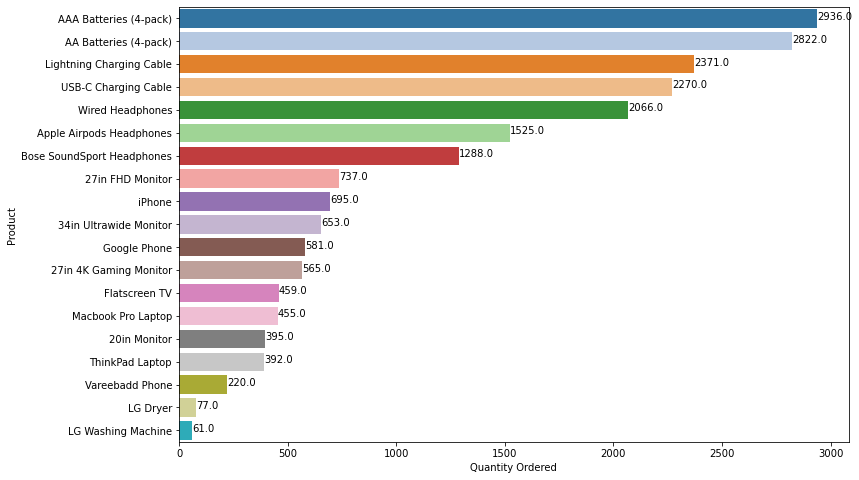

In [27]:
# sns.set_style("ticks")

# plt.rcParams["figure.figsize"] = (10,5)
plt.figure(figsize=(12,8))

ax=sns.barplot('Quantity Ordered','Product',data=df,palette= 'tab20')
for p in ax.patches:
    point= p.xy
    ax.text(p.get_width(),point[1]+0.45,p.get_width())

    




In [28]:
'''conclusion := AAA Batteries (4-pack) ,AA  Batteries (4-pack) maximum sold  
Reason: This battery size is most often used in small devices such as laser pointers, 
LED penlights, powered computer styluses, glucose meters, 
and small headphone amplifiers and LG Washing Machine less sold because 
Manufacturer Warranty: 2 years on product and 10 years on motor

another things here is here Usb cable highly use that's means here  people use  maximum mobile phone and laptop usesabs
for jobs and social media 

wiredheadphone 2066 quantity it's indicate here people likes  introvert behaviour 
and near future  people is  suffer from anxity and depression 
'''


"conclusion := AAA Batteries (4-pack) ,AA  Batteries (4-pack) maximum sold  \nReason: This battery size is most often used in small devices such as laser pointers, \nLED penlights, powered computer styluses, glucose meters, \nand small headphone amplifiers and LG Washing Machine less sold because \nManufacturer Warranty: 2 years on product and 10 years on motor\n\nanother things here is here Usb cable highly use that's means here  people use  maximum mobile phone and laptop usesabs\nfor jobs and social media \n\nwiredheadphone 2066 quantity it's indicate here people likes  introvert behaviour \nand near future  people is  suffer from anxity and depression \n"

In [29]:
# which day shop got maximum order ?
# which day shop got minimum order ?

df=sales_april_clean.groupby(['ord_date_day'],as_index=False).agg({'Quantity Ordered':sum})
df=df.sort_values(by='Quantity Ordered')
df.reset_index(0,inplace=True,drop=True)
df['ord_date_day']=df['ord_date_day'].astype(str) 
df

,ord_date_day,Quantity Ordered
0,19,627
1,15,635
2,22,641
3,7,641
4,25,654
5,26,659
6,20,663
7,2,663
8,23,670
9,28,673


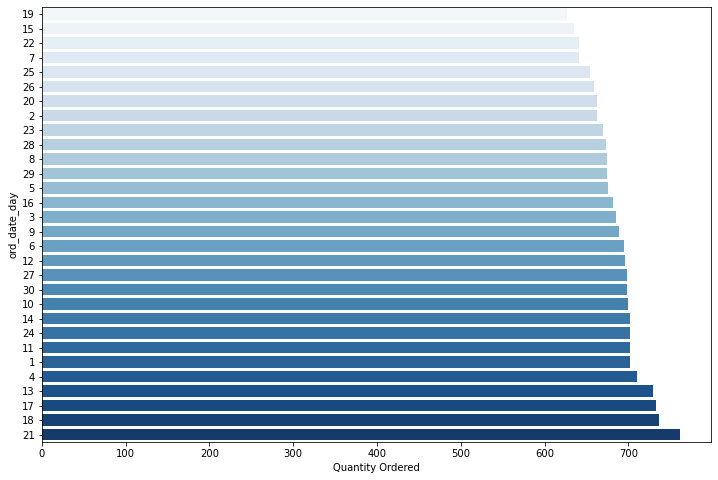

In [30]:
plt.figure(figsize=(12,8))

ax=sns.barplot('Quantity Ordered','ord_date_day',data=df,palette= 'Blues',orient='h')



In [31]:
'''The following is a compilation of American federal holidays, federal observances, state holidays and other 
common patriotic and national observances and commemorations that apply to the United States during Sunday, 2019-04-21:'''

'''Easter Sunday:
Easter falls on a spring Sunday that varies from year to year. 
Easter is recognized as a flag day but has not been a federal holiday due to falling always on a Sunday,
which is a non-working day for federal and state employees. However, many companies, including banks, malls,
shopping centers and most private retail stores that normally open on Sundays are closed on Easter. 
Easter is a Christian holiday celebrating the resurrection of Jesus Christ. For Christians, Easter is a day of religious services and the gathering of family. Many Americans follow old traditions of coloring hard-boiled eggs and giving children baskets of candy.
Note: april 19 is normal day may be sad day i don't know  '''

"Easter Sunday:\nEaster falls on a spring Sunday that varies from year to year. \nEaster is recognized as a flag day but has not been a federal holiday due to falling always on a Sunday,\nwhich is a non-working day for federal and state employees. However, many companies, including banks, malls,\nshopping centers and most private retail stores that normally open on Sundays are closed on Easter. \nEaster is a Christian holiday celebrating the resurrection of Jesus Christ. For Christians, Easter is a day of religious services and the gathering of family. Many Americans follow old traditions of coloring hard-boiled eggs and giving children baskets of candy.\nNote: april 19 is normal day may be sad day i don't know  "

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0'),
  Text(21, 0, '21.0'),
  Text(22, 0, '22.0'),
  Text(23, 0, '23.0'),
  Text(24, 0, '24.0')])

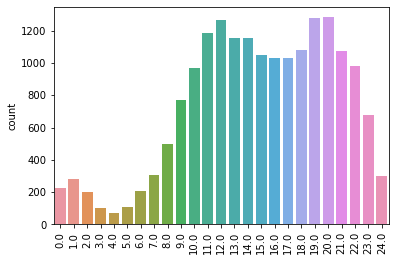

In [32]:
# which time shop got maximum order(24 hours ) ?
# which time shop got minimum order(24 hours ) ?
df=sales_april_clean
l1=round(df['ord_time'],0)
sns.countplot(sorted(l1))
plt.xticks(rotation=90)

In [ ]:
# which state(zip) bought  maximum e-devices from this shop and with area?